<a href="https://colab.research.google.com/github/BassemLakret/blakret.github.io/blob/main/PW3__MISE1_GroupE_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Groupe: MISE1; Student1BERRADA Lina; Student2SAMRAOUI Hiba ; Student3LAKRET Bassem

Note : .../20

**Title: Image Segmentation with Thresholding and Edge Detection**
# I- Objective

Understand and apply two fundamental image segmentation techniques: thresholding and edge
detection. This exercise will guide you through the use of these techniques to segment the uploaded
image using Python and the OpenCV library.

# **II- Tools and Requirements**

• Basic knowledge of Python.
• OpenCV installed on your system (pip install opencv-python-headless).
• An IDE or text editor for writing Python scripts.
• The provided image file named image.png.

# **III- Duration : 3 hours**

# **IV- Parts to be carried out**



In [ ]:
pip install opencv-python-headless

In [ ]:
import pandas as pd
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread("/content/sample_data/bird.jpg")
def display_image(img):
  cv2_imshow(img)
  cv2.waitKey(0)

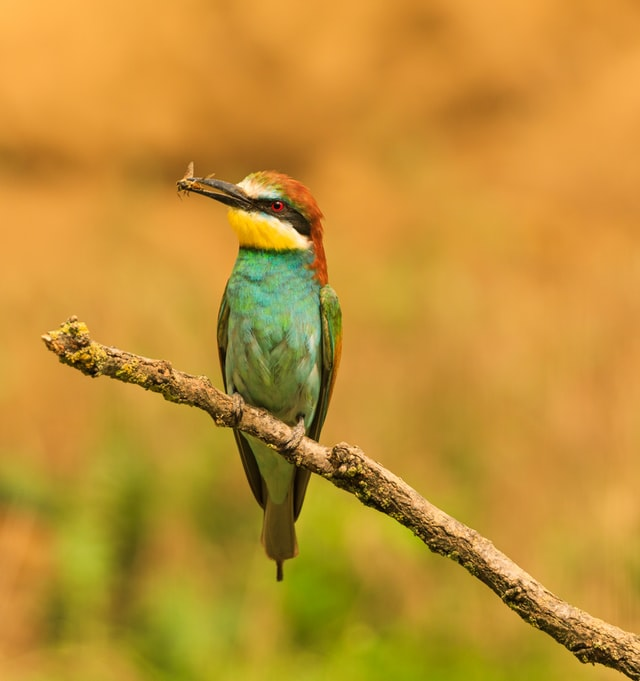

In [ ]:
display_image(img)

Part 1: Thresholding

*Task 1.1: Basic Thresholding*

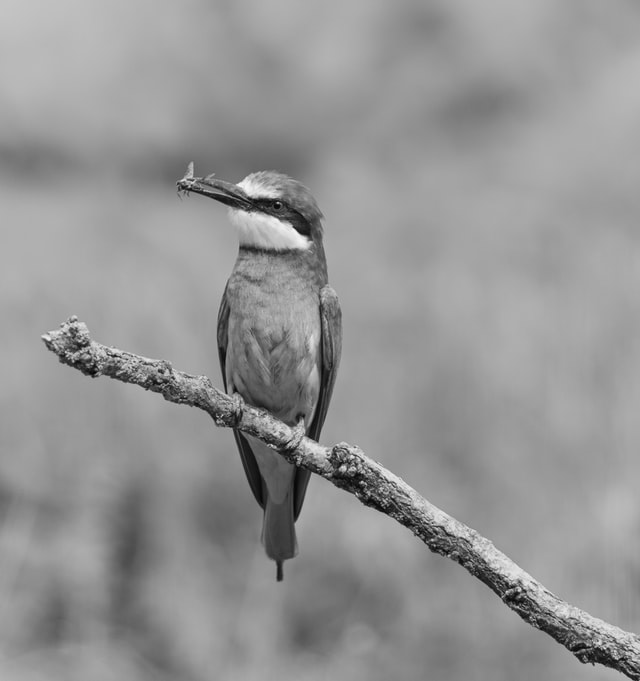

True

In [ ]:
# Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

display_image(gray_img)
cv2.imwrite('greyscale_image.jpg', gray_img)

This code converts the image to grayscale using the cv2.cvtColor function with the parameter cv2.COLOR_BGR2GRAY.

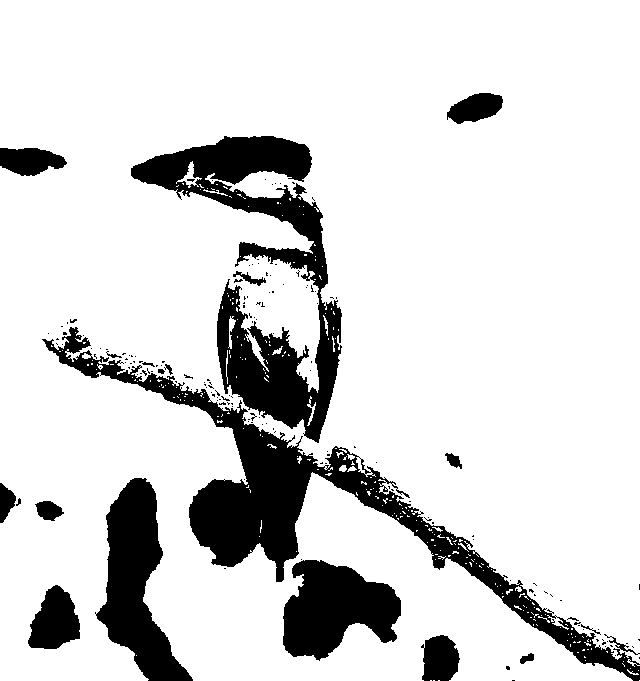

True

In [ ]:
# Apply global thresholding with a set value (e.g., 127)
threshold_value = 127
th, binary_img = cv2.threshold(gray_img, threshold_value, 255, cv2.THRESH_BINARY)

display_image(binary_img)
cv2.imwrite('binary_image.jpg', binary_img)


This code snippet demonstrates the application of global thresholding with a specified threshold value of 127 on a grayscale image :
- threshold_value = 127: This line sets the threshold value to 127, which will be used to classify pixel intensities in the image as either foreground or background.
- th, binary_img = cv2.threshold(gray_img, threshold_value, 255, cv2.THRESH_BINARY): In this line, the cv2.threshold function is applied to the grayscale image (gray_img) using the specified threshold value (127). The function returns two values: th (threshold value used) and binary_img (the resulting binary image) so the pixels with intensity values greater than the threshold are set to 255 (white), while those below are set to 0 (black), creating then a binary image.
The resulting binary image will have pixel values of either 0 or 255 based on their intensity compared to the threshold value.

*Task 1.2: Adaptive Thresholding*

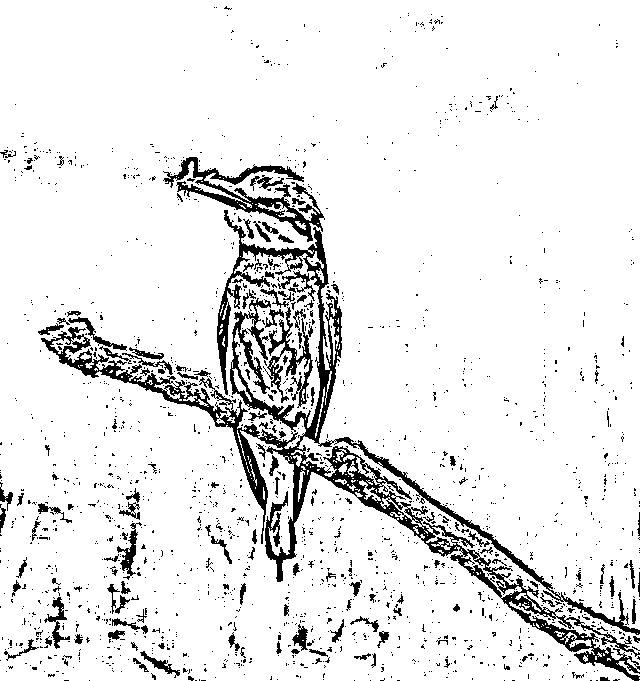

True

In [ ]:
# Apply adaptive thresholding
# Parameters: source image, max pixel value, adaptive method, threshold type, block size, constant subtracted from the mean
binary2_img = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
display_image(binary2_img)
cv2.imwrite('binary2_image.jpg', binary2_img)

This code shows the application of adaptive thresholding on a grayscale image using the specified parameters:
- binary2_img = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2): In this line, the cv2.adaptiveThreshold function is used to perform adaptive thresholding on the grayscale image (gray_img). The parameters of the function are:
- "gray_img" : The source grayscale image.
- "255" : The maximum pixel value that can be assigned.
- "cv2.ADAPTIVE_THRESH_MEAN_C" : The adaptive method used, which calculates the threshold value as the mean of the neighborhood area.
- "cv2.THRESH_BINARY" : The type of thresholding applied after calculating the adaptive threshold.
- "11" : The size of the pixel neighborhood used to calculate the adaptive threshold.
- "2" : A constant subtracted from the calculated mean. This helps fine-tune the thresholding process.

In summary, this code segment applies adaptive thresholding on a grayscale image using the mean method with a block size of 11 and a constant of 2 subtracted from the mean. The resulting binary image will have varying thresholds across different regions of the image based on local pixel intensities.

*Task 1.3: Otsu's Binarization*

In [ ]:
otsu_threshold, image_result = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU,)
print("Obtained threshold: ", otsu_threshold)

Obtained threshold:  127.0


These codes apply Otsu's thresholding method to the grayscale image. Otsu's thresholding is an automatic thresholding technique that calculates the optimal threshold value based on the image's histogram. The cv2.threshold function is used with the parameters cv2.THRESH_BINARY + cv2.THRESH_OTSU to apply Otsu's thresholding. The resulting threshold value is stored in otsu_threshold, and the binary image after applying the threshold is stored in image_result. The obtained threshold value is then printed out using the print statement "Obtained threshold: " followed by the value of otsu_threshold.

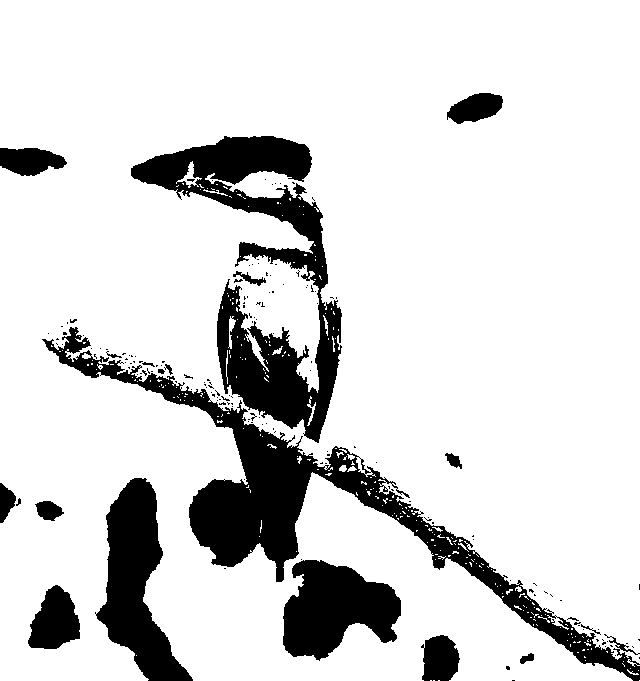

In [ ]:
display_image(image_result)

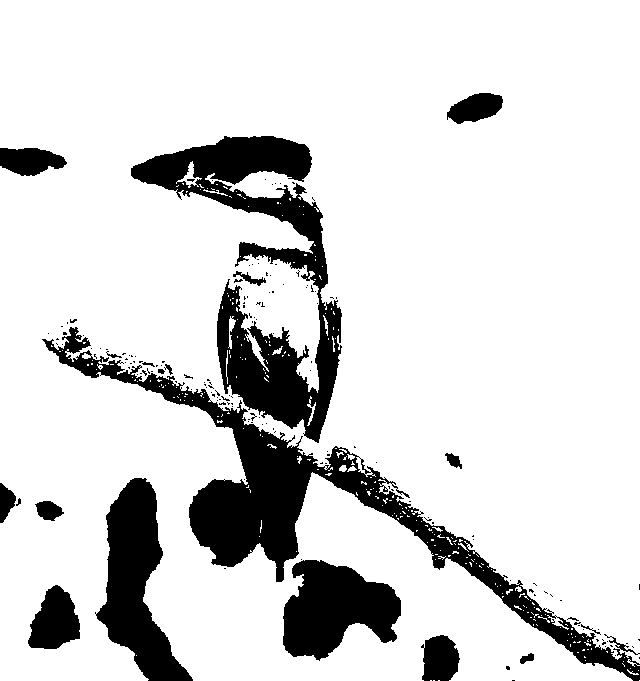

In [ ]:
##Second version
_, Otsu_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
display_image(Otsu_img)

This code also applies Otsu's thresholding method to the grayscale image. The difference between this code and the previous one lies in how the threshold value is handled.*In the first version:*
Here, the threshold value calculated by Otsu's method is stored in the variable otsu_threshold, and then this threshold value is used to create a binary image image_result.
*In the second version:*
the threshold value calculated by Otsu's method is not explicitly stored in a variable for later use. Instead, the threshold value is discarded by using _ as a placeholder. The resulting binary image after applying the Otsu threshold is stored in Otsu_img, which is then displayed using the display_image function.

Both versions of the code apply Otsu's thresholding method to the grayscale image using the same parameters.
both versions of code have the same result as ouput.




Part 2: Edge Detection

*Task 2.1: Sobel Edge Detection*

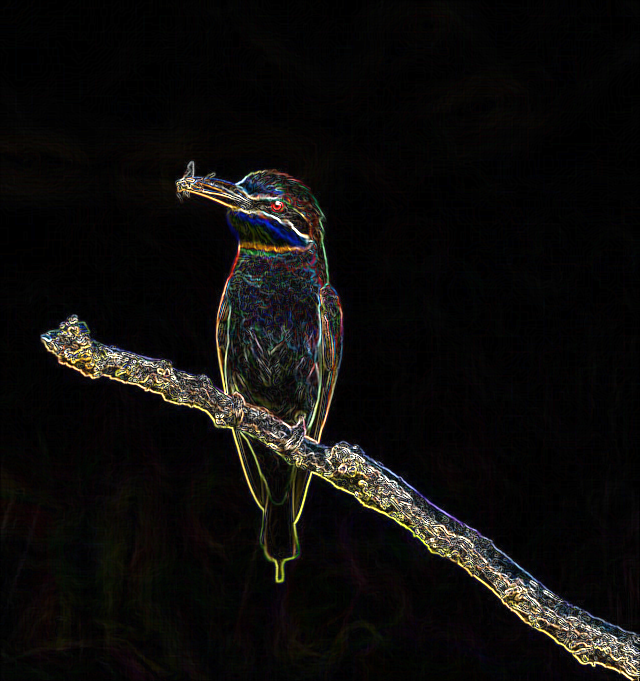

True

In [ ]:
# Sobel operator
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)  # Gradient in the x-direction
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)  # Gradient in the y-direction

# Convert the gradients to absolute values because edges can have both positive and negative gradients depending on whether the intensity transition is from dark to bright (positive gradient) or from bright to dark (negative gradient).
# By taking the absolute values, we ensure that both types of edges are captured.
sobel_x = np.absolute(sobel_x)
sobel_y = np.absolute(sobel_y)

# Combine the gradients
sobel_combined = cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0)

display_image(sobel_combined)
cv2.imwrite('sobel_combined_image.jpg', sobel_combined)


The cv2.Sobel() function is used to apply the Sobel operator. The cv2.CV_64F argument specifies the data type of the output image.

The 1 and 0 arguments in the first Sobel() call indicate that we want to compute the gradient in the x-direction, while the 0 and 1 arguments in the second Sobel() call indicate the gradient in the y-direction.

The ksize=3 argument sets the size of the Sobel kernel.


The weight value of 0.5 in the cv2.addWeighted() function balances the contribution of the x-direction and y-direction gradients equally in the final combined image.

If we increase the weight value:
* The corresponding gradient (x or y direction) will have a higher influence in the final combined image.
* There will be a stronger emphasis on the edges aligned with the direction of the gradient with the increased weight.
If we decrease the weight value:
* The corresponding gradient will have a lower influence in the final combined image.
* There will be a weaker emphasis on the edges aligned with the direction of the gradient with the decreased weight.



*Task 2.2: Laplacian Edge Detection*

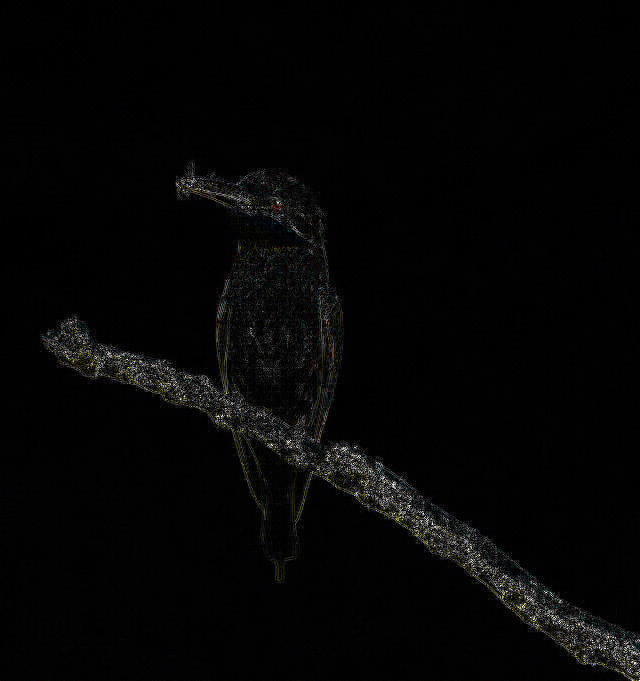

True

In [ ]:
# Apply Laplacian operator
laplacian = cv2.Laplacian(img, cv2.CV_64F)

# Convert the output to the absolute value
laplacian = cv2.convertScaleAbs(laplacian)

display_image(laplacian)
cv2.imwrite('laplacian_image.jpg', laplacian)

The cv2.Laplacian() function is used to apply the Laplacian operator. The cv2.CV_64F argument specifies the data type of the output image, which represents the second derivative of the image.


The Laplacian operator is applied to the image  using the cv2.Laplacian() function. The Laplacian operator is a filter that is commonly used for edge detection and computes the second derivative of the image intensity. The result is stored in the variable laplacian.


If we use a different data type in the cv2.Laplacian() function, it can affect the precision and range of values in the output.

1st type : Floating-Point Data Types (e.g., cv2.CV_64F, cv2.CV_32F): The Laplacian operator can produce more precise results compared to integer types. Floating-point data types can represent a wider range of values and can capture subtle variations in the image intensity. This can be beneficial for edge detection, especially in cases where fine details need to be preserved.

2nd type : Integer Data Types (e.g., cv2.CV_8U, cv2.CV_16U, cv2.CV_32S):Integer These data types have a limited range of representable values, which can result in quantization and loss of precision during the Laplacian operation. The output edges may appear more coarse or less detailed compared to floating-point data types.

*Task 2.3: Canny Edge Detection*

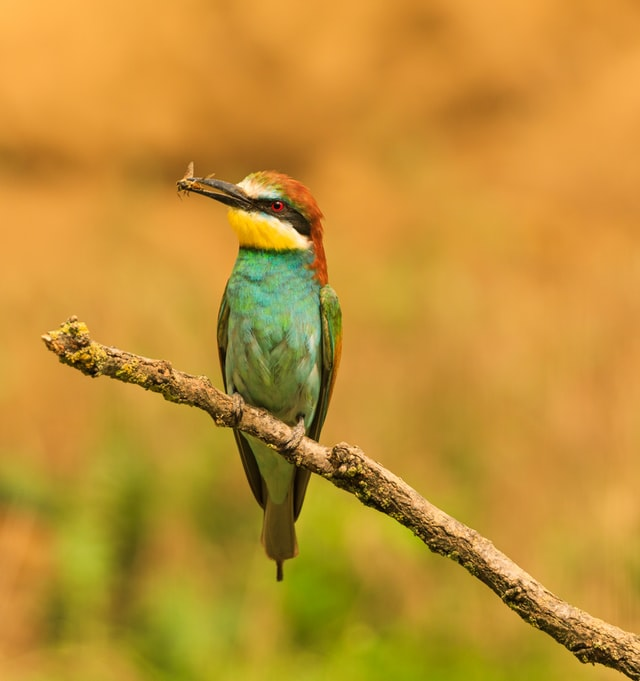

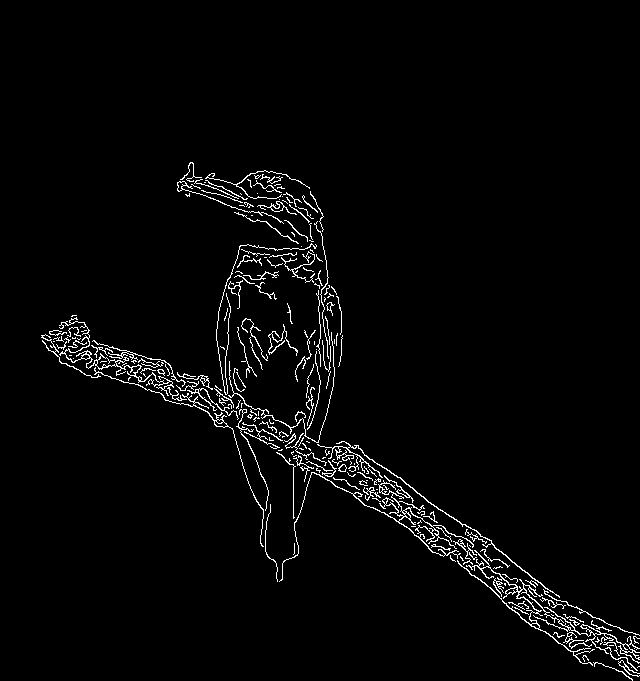

In [ ]:
# Apply Gaussian blur to reduce noise
blurred_img = cv2.GaussianBlur(img, (5, 5), 0)

# Apply Canny edge detection
edges = cv2.Canny(blurred_img, threshold1=30, threshold2=150)

# Display the original and edge-detected images
display_image(img)
display_image(edges)


First, the Gaussian blur is applied to the input image  using the cv2.GaussianBlur() function. The purpose of this step is to reduce noise and smooth out the image. The (5, 5) parameter specifies the size of the kernel used for blurring, and 0 indicates that the standard deviation of the Gaussian kernel will be calculated automatically based on the kernel size. (We saw it in PW2)
Changing the kernel size (5, 5) will affect the amount of blurring applied to the image. A larger kernel size will result in more blurring and stronger noise reduction, while a smaller kernel size will yield less blurring and potentially retain more details and noise.

Then, the Canny edge detection algorithm is applied to the blurred image  using the cv2.Canny() function. The Canny edge detection algorithm identifies edges based on the intensity gradients in the image.
The threshold1 and threshold2 parameters control the edge detection sensitivity. Any gradient value above threshold2 is considered a strong edge, while any value below threshold1 is considered a weak edge and will be discarded. Gradient values between the two thresholds are considered as potential edges and are further analyzed based on their connectivity.

Changing the threshold1 and threshold2 values will impact the edge detection results:
* Decreasing the threshold values will make the edge detection more sensitive. It will potentially detect weaker edges and increasing the number of detected edges.
* Increasing the threshold values will make the edge detection less sensitive. It will result in fewer detected edges and potentially missing some weaker edges

#BONUS

> Multi-Otsu Thresholding



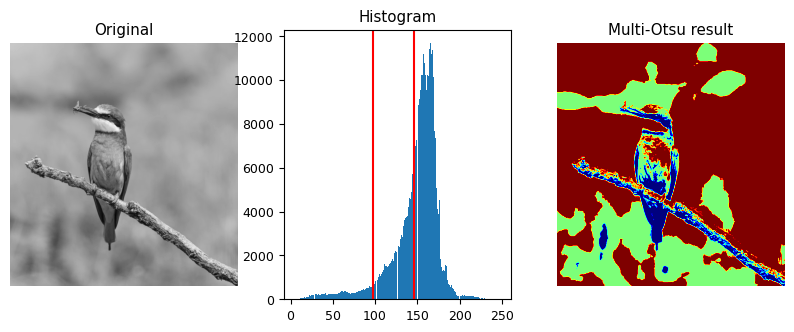

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data
from skimage.filters import threshold_multiotsu

# Setting the font size for all plots.
matplotlib.rcParams['font.size'] = 9

# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(gray_img)

# Using the threshold values, we generate the three regions.
regions = np.digitize(gray_img, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(gray_img, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(gray_img.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

The Multi-Otsu thresholding algorithm is used to separate the pixels of an input image into multiple classes based on the intensity of gray levels within the image. It calculates several thresholds, with the number of thresholds determined by the desired number of classes.

By default, the Multi-Otsu algorithm is designed to obtain three classes. This means it will return two threshold values that divide the pixel intensities into three regions. These thresholds are represented by a red line in the histogram.

The histogram of the image represents the distribution of pixel intensities. Each bin in the histogram corresponds to a range of intensity values, and the height of each bin represents the number of pixels with intensities falling within that range.

The Multi-Otsu algorithm aims to find threshold values that separate the histogram into regions such that the pixels within each region have similar intensity characteristics. The algorithm optimizes the thresholds to minimize the variance within each region and maximize the variance between the regions.

For example, if we have a grayscale image and apply the Multi-Otsu algorithm with three classes, it will find two threshold values. These thresholds will divide the histogram into three regions:
- one for low-intensity pixels
- one for medium-intensity pixels
- one for high-intensity pixels.

The red line in the histogram indicates the positions of the threshold values.

By using these threshold values, we can assign each pixel in the image to one of the three classes based on its intensity value. This allows us to segment the image into different regions or objects based on the intensity information.

The number of classes can be adjusted based on the specific requirements of the application. For instance, if we want to segment an image into four regions, we can modify the algorithm to calculate three threshold values to achieve that.

The Multi-Otsu thresholding algorithm is widely used in various image processing applications, such as image segmentation, object recognition, and feature extraction. It provides an automated way to separate an image into distinct regions based on intensity characteristics.

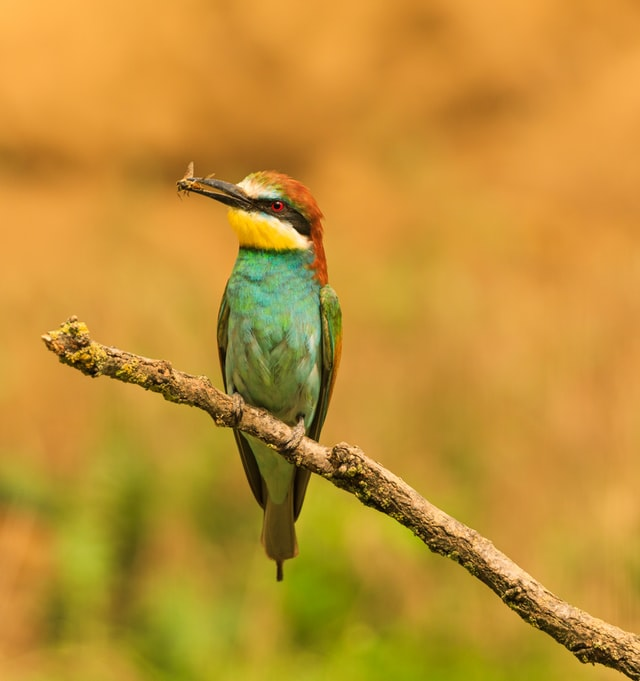

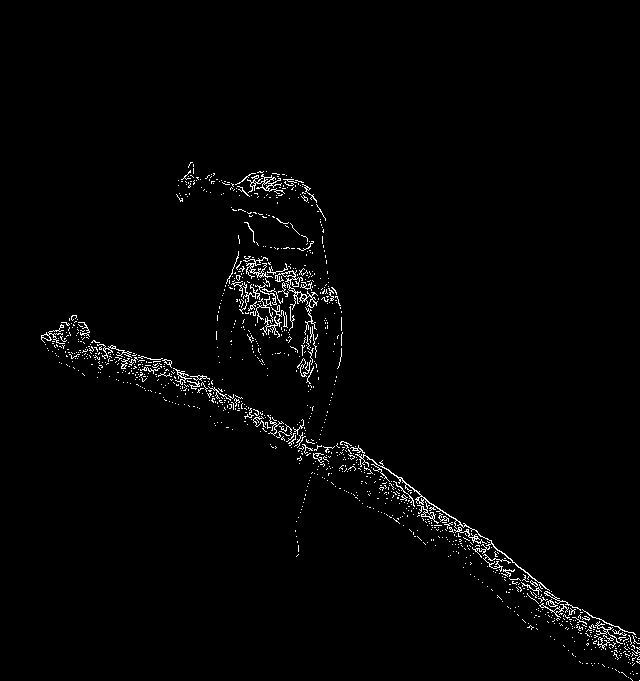

True

In [ ]:
from google.colab.patches import cv2_imshow

# Apply global thresholding with a set value (e.g., 127)
threshold_value = 127
_, binary_img = cv2.threshold(gray_img, threshold_value, 255, cv2.THRESH_BINARY)

# Apply Canny edge detection
edges = cv2.Canny(gray_img, threshold1=30, threshold2=150)

# Combine the binary image and edges using bitwise AND
combined_img = cv2.bitwise_and(binary_img, binary_img, mask=edges)

display_image(img)
display_image(combined_img)
cv2.imwrite('combined_segmentation.jpg', combined_img)


By combining the binary thresholded image with the edges detected from edge detection using a bitwise AND operation, we can retain only the regions where both the binary image and the edges overlap. This operation ensures that only the regions with strong edges and high intensity values in the binary image are preserved, while other noise or weakly defined regions are eliminated. The resulting image provides a more refined segmentation output that combines the advantages of both techniques.

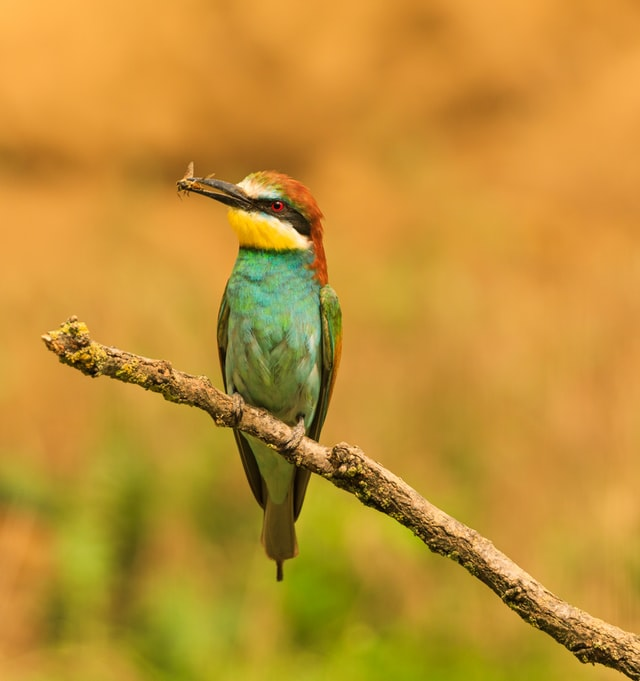

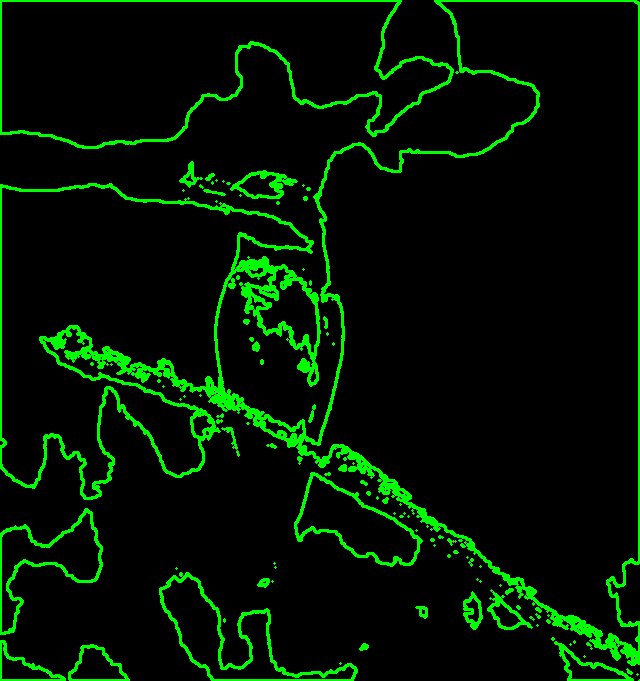

True

In [ ]:
# Apply global thresholding with a set value (e.g., 100)
threshold_value = 150
_, binary_img = cv2.threshold(gray_img, threshold_value, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a blank image to draw contours on
contour_img = np.zeros_like(img)

# Draw contours on the blank image
cv2.drawContours(contour_img, contours, -1, (0, 255, 0), thickness=2)

display_image(img)
display_image(contour_img)

cv2.imwrite('contour_image.jpg', contour_img)

The goal of this code is to identify and visualize the boundaries of objects within an image. By performing global thresholding, the binary image is obtained, which separates the foreground and background. Then, by detecting and drawing the contours of the objects on a blank image, the boundaries of the objects are highlighted in green.

This approach can be useful in various applications, such as object recognition, shape analysis, and region-based image processing. It enables the extraction of object boundaries for further analysis or to guide subsequent image processing tasks.

# Analysis

**Part 1: Normal and adaptative thresholding**

Normal thresholding, also known as global thresholding, involves applying a single threshold value to the entire image to separate pixels into foreground and background based on their intensity. This method is simple and easy to implement but may not be effective when dealing with images that have non-uniform lighting conditions or varying pixel intensities across different regions.
On the other hand, adaptive thresholding, also referred to as local thresholding, considers small neighborhoods of pixels within the image and calculates an optimal threshold value for each neighborhood. This approach allows for more flexibility in handling images with varying lighting conditions and pixel intensities. By analyzing local regions of the image separately, adaptive thresholding can better account for changes in illumination and provide more accurate segmentation results.

The effectiveness of each segmentation technique, normal thresholding, and adaptive thresholding, can be evaluated based on their ability to accurately segment images with varying lighting conditions and pixel intensities.


Normal Thresholding (Global Thresholding):

*Advantages:*
Simple and easy to implement.
Effective for images with uniform lighting conditions.

*Disadvantages:*
May struggle with images having non-uniform lighting conditions.
Requires manual selection of a single threshold value, which may not be optimal for all image regions.



Adaptive Thresholding (Local Thresholding):

*Advantages:*
Considers local pixel neighborhoods for threshold calculation, suitable for images with varying lighting conditions.
Can adapt to different parts of the image with varying illumination levels.

*Disadvantages:*
More computationally intensive compared to global thresholding.
The choice of the neighborhood size is crucial; if too small, it may not cover sufficient background and foreground pixels, while if too large, it may violate the assumption of uniform illumination.

In summary, adaptive thresholding is more effective than normal thresholding when dealing with images that have non-uniform lighting conditions or dramatic ranges of pixel intensities across different regions. Adaptive thresholding's ability to calculate optimal thresholds locally for each neighborhood allows for more accurate segmentation in such scenarios. However, the choice of the neighborhood size is critical in adaptive thresholding to ensure effective segmentation results.

**Otsu's binarization**

Otsu's method is effective for simple image thresholding tasks and scenarios where bimodal histograms are present. It is useful for segmenting images into foreground and background regions, aiding in object detection, medical imaging analysis, and document processing.





**Part 2 : EDGE DETECTION**

Edge detection plays an important role in computer vision and image processing applications. It involves identifying boundaries and transitions between objects in an image.

**Sobel Edge Detection**:Sobel edge detection is a gradient-based method that calculates the first derivative of the image intensity. It utilizes separate filters in the horizontal and vertical directions to compute the gradient. Sobel edge detection is computationally efficient and often used in real-time applications. However, it is sensitive to noise and may require additional steps such as blurring or thresholding to enhance results. Typical applications of Sobel edge detection include object tracking, feature extraction, and image segmentation.

**Canny Edge Detection**:Canny edge detection is a multi-stage algorithm that aims to provide optimal edge detection results. It involves steps such as Gaussian blurring. Canny edge detection is known for its accuracy and robustness in detecting edges while suppressing noise and minimizing false detections. It allows fine control over the edge detection process through adjustable thresholds. Canny edge detection finds applications in image recognition, object detection, and computer vision tasks that require precise edge localization and low sensitivity to noise.

**Laplacian Edge Detection**:Laplacian edge detection directly calculates the second derivative of the image intensity. It identifies areas of rapid intensity changes or zero-crossings in the Laplacian of the image. While Laplacian edge detection is computationally efficient, it is more sensitive to noise compared to other methods. It can produce thin and accurate edges but may also generate false positives and noise artifacts. Laplacian edge detection is commonly used for edge enhancement, contour detection, and texture analysis.
In conclusion, Sobel edge detection, Canny edge detection, and Laplacian edge detection are techniques used for edge detection in various applications. Sobel edge detection is efficient but sensitive to noise, Canny edge detection provides accurate results with noise suppression, and Laplacian edge detection is computationally efficient but more sensitive to noise. The choice of technique depends on the specific requirements of the application, such as real-time processing, noise sensitivity, or the need for precise edge localization.


# Conclusion and Applications


*Applications:*

- Object Detection: These techniques can be used to identify and locate objects within images by detecting edges or distinct regions based on pixel intensity.
- Image Enhancement: Edge detection can enhance the visual quality of images by highlighting important features and reducing noise.
- Medical Imaging: Edge detection is commonly used in medical image processing for tasks such as tumor detection, organ segmentation, and boundary delineation.
- Industrial Automation: These techniques can be applied in manufacturing environments for quality control, defect detection, and object tracking on assembly lines.
- Autonomous Vehicles: Edge detection plays a crucial role in the perception systems of autonomous vehicles for detecting lane boundaries, obstacles, and pedestrians.
By understanding and applying these techniques, can create robust computer vision applications suitable for a wide range of real-world scenarios.

To conclude, the provided notebook demonstrates the implementation of various image segmentation techniques using Python and the OpenCV library. It begins with thresholding techniques, both global and adaptive, to binarize the image based on pixel intensity. Additionally, it applies the Otsu thresholding method, which automatically calculates an optimal threshold value.
Furthermore, edge detection methods including the Sobel operator, Laplacian operator, and Canny edge detection are employed to highlight edges within the image. These techniques enhance the visual perception of object boundaries, making them useful for tasks such as object detection, image recognition, and feature extraction.
